# **FOOD HUB: CHEWING THE NUMBERS**

**Foundations of data Analysis**

**Massachusetts institute of Technology**
**and Great Learning**

By Jeffandy St.Hubert

June 19, 2024


--------------
## **Table of contents:**
--------------
- Executive Summary
- Business Problem & Solution
- Data Overview
- EDA Univariate Analysis
- EDA Multivariate Analysis
- Thank You

----------------
## **Business Problem:**
----------------

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

----------------
## **Objective:**
----------------

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. The Data Science team at Foodhub has shared some of the key questions that need to be answered. I will perform the data analysis to find answers to these questions and help the company improve the business.

-----------------------------
## **Data Description:**
-----------------------------

The data contains the different data related to a food order.
I have written data dictionary below

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost_of_the_order: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

Code to import the required libraries

---



In [ ]:
# Import libraries for data manipulation
import numpy as np
import pandas as pd

# Import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

### code to understand the structure of the data

In [ ]:
from google.colab import drive
drive.mount("/content/drive/")

Mounted at /content/drive/


In [ ]:
path = "/content/drive/MyDrive/AllTogether_Solutions_Inc/Python_Drive/foodhub_order.csv"
# Read the data
df = pd.read_csv(path)
# Returns the first 5 rows
df.head(7)

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24
5,1477224,147468,Tamarind TriBeCa,Indian,25.22,Weekday,3,20,24
6,1477894,157711,The Meatball Shop,Italian,6.07,Weekend,Not given,28,21


In [ ]:
df

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24
...,...,...,...,...,...,...,...,...,...
1893,1476701,292602,Chipotle Mexican Grill $1.99 Delivery,Mexican,22.31,Weekend,5,31,17
1894,1477421,397537,The Smile,American,12.18,Weekend,5,31,19
1895,1477819,35309,Blue Ribbon Sushi,Japanese,25.22,Weekday,Not given,31,24
1896,1477513,64151,Jack's Wife Freda,Mediterranean,12.18,Weekday,5,23,31


### Code to see how many rows and columns are present in the data

In [ ]:
# Check the shape of the dataset
df.shape

(1898, 9)

### Code to see What are the datatypes of the different columns in the dataset

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


code to check for missing values

In [ ]:
# Checking for missing values in the data
# there is missing data but it is coming in as the string " not given" so I am replacing this string with Nan"
df.replace('Not given', np.nan, inplace=True) # Replacing 'Not given' with NaN

#now I am calculating the sum of null values for each column
null_values = df.isnull().sum()  #code to print the sum of null values for each column
for column, count in null_values.items():
    print(f"{column}: {count} null values")

order_id: 0 null values
customer_id: 0 null values
restaurant_name: 0 null values
cuisine_type: 0 null values
cost_of_the_order: 0 null values
day_of_the_week: 0 null values
rating: 736 null values
food_preparation_time: 0 null values
delivery_time: 0 null values


### The code I wrote to check the minimum, average, and maximum time it takes for food to be prepared once an order is placed?

In [ ]:
# Get the summary statistics of the numerical data
df.describe(include="all").T ## Code to print the statitical summary of the data
# J# the minimum food prep time is 20 minutes and the max is 35 minutes

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
order_id,1898.0,NaN,NaN,NaN,1477495.5,548.049724,1476547.0,1477021.25,1477495.5,1477969.75,1478444.0
customer_id,1898.0,NaN,NaN,NaN,171168.478398,113698.139743,1311.0,77787.75,128600.0,270525.0,405334.0
restaurant_name,1898,178,Shake Shack,219,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cuisine_type,1898,14,American,584,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cost_of_the_order,1898.0,NaN,NaN,NaN,16.498851,7.483812,4.47,12.08,14.14,22.2975,35.41
day_of_the_week,1898,2,Weekend,1351,NaN,NaN,NaN,NaN,NaN,NaN,NaN
rating,1162,3,5,588,NaN,NaN,NaN,NaN,NaN,NaN,NaN
food_preparation_time,1898.0,NaN,NaN,NaN,27.37197,4.632481,20.0,23.0,27.0,31.0,35.0
delivery_time,1898.0,NaN,NaN,NaN,24.161749,4.972637,15.0,20.0,25.0,28.0,33.0


### Code to check how many orders are not rated?

In [ ]:
df.fillna('Not given', inplace=True)
#I know the answer is 736 from above but lets check again
df['rating'].value_counts()

rating
Not given    736
5            588
4            386
3            188
Name: count, dtype: int64

### Exploratory Data Analysis (EDA)

### Univariate Analysis

### Exploring all the variables and providing observations on their distributions.

#### Order ID

In [ ]:
# check unique order ID
df['order_id'].nunique()

1898

#### Customer ID

In [ ]:
# check unique customer ID
df['customer_id'].nunique()  ## Code to find out number of unique Customer ID

1200

#### Restaurant name

In [ ]:
# check unique Restaurant Name
df['restaurant_name'].nunique()  ## Code to find out number of unique Restaurant Name

178

#### Cuisine type

In [ ]:
# Check unique cuisine type
df['cuisine_type'].nunique() ## Code to find out  number of  unique cuisine type

14

<Axes: xlabel='cuisine_type', ylabel='count'>

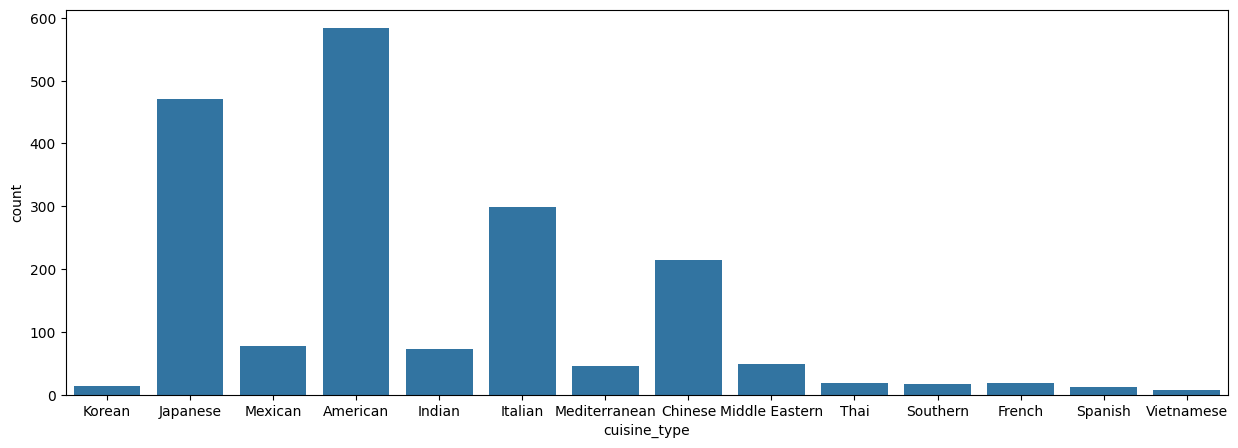

In [ ]:
plt.figure(figsize = (15,5))
sns.countplot(data = df, x = 'cuisine_type') ## Create a countplot for cuisine type.

#### Cost of the order

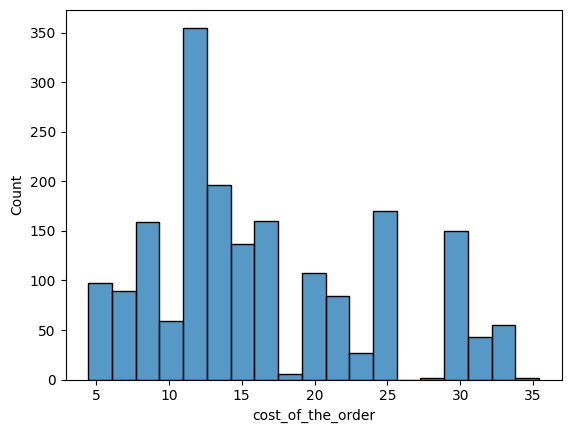

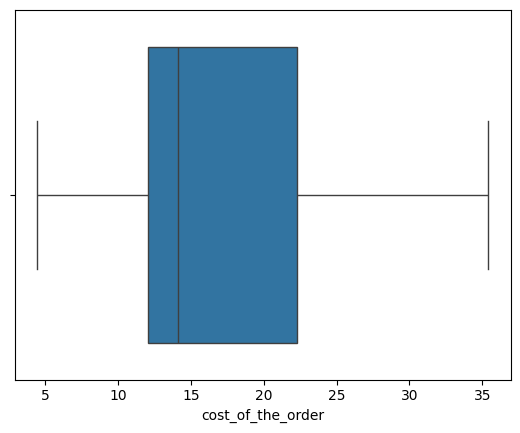

In [ ]:
sns.histplot(data=df,x='cost_of_the_order') ## Histogram for the cost of order
plt.show()
sns.boxplot(data=df,x='cost_of_the_order') ## Boxplot for the cost of order
plt.show()

#### Day of the week

In [ ]:
# # Check the unique values
df['day_of_the_week'].nunique() ## Code to check unique values for the 'day_of_the_week' column

2

<Axes: xlabel='day_of_the_week', ylabel='count'>

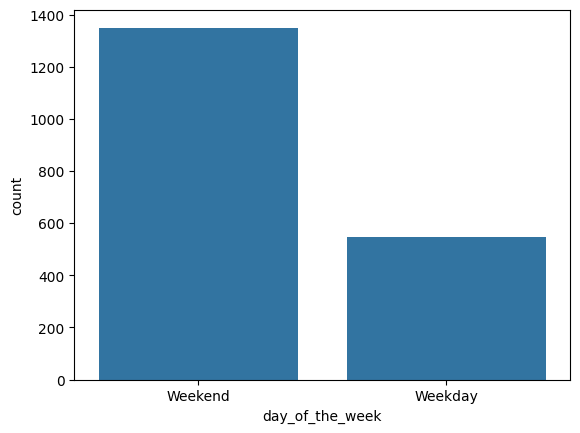

In [ ]:
sns.countplot(data = df, x = 'day_of_the_week') ## Code to plot a bar graph for 'day_of_the_week' column

#### Rating

In [ ]:
# Check the unique values
df['rating'].nunique() ## Code to check unique values for the 'rating' column

4

<Axes: xlabel='rating', ylabel='count'>

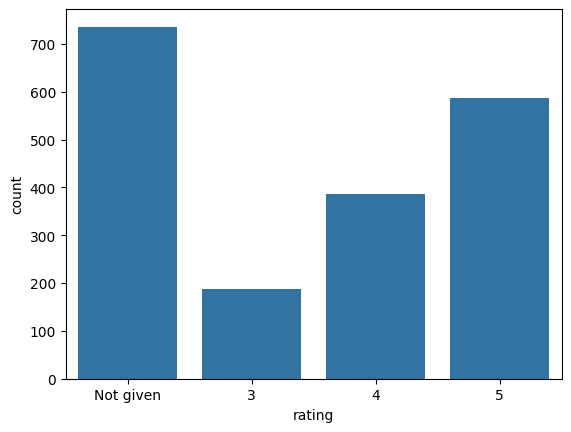

In [ ]:
sns.countplot(data = df, x = 'rating', order=['Not given', 3, 4, 5]) ## Code to plot bar graph for 'rating' column

#### Food Preparation time

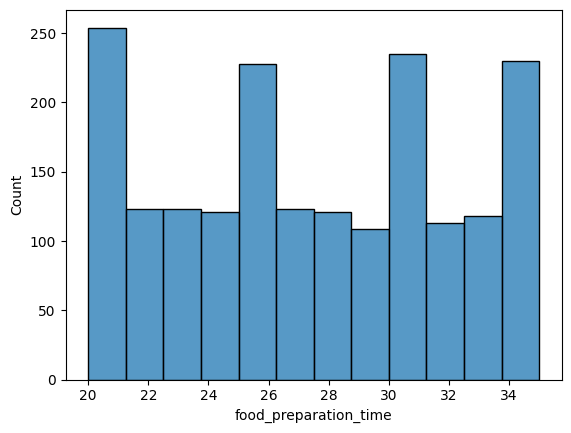

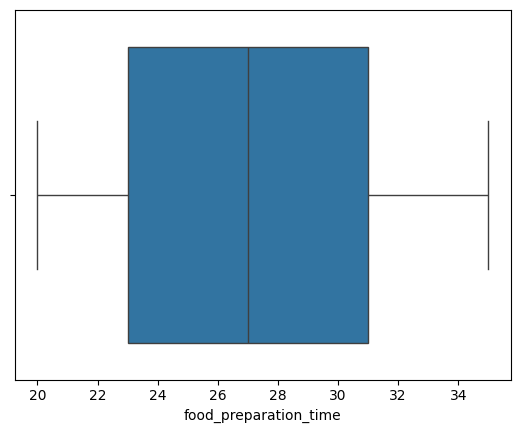

In [ ]:
sns.histplot(data=df,x='food_preparation_time') ## Code to plot the histogram for the cost of order
plt.show()
sns.boxplot(data=df,x='food_preparation_time') ## Code to plot the boxplot for the cost of order
plt.show()

#### Delivery time

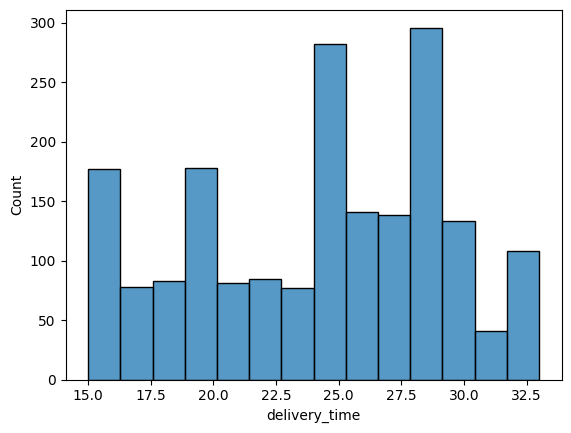

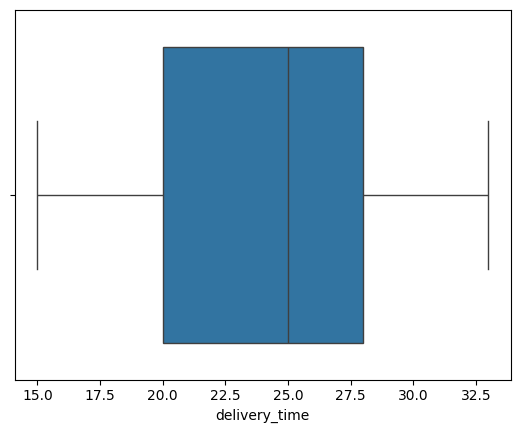

In [ ]:
sns.histplot(data=df,x='delivery_time') ## Code to plot the histogram for the delivery time
plt.show()
sns.boxplot(data=df,x='delivery_time') ## Code to plot the boxplot for the delivery time
plt.show()

### Code to find the top 5 restaurants in terms of the number of orders received

In [ ]:
# Get top 5 restaurants with highest number of orders
df['restaurant_name'].value_counts().head(5)

restaurant_name
Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
Name: count, dtype: int64

### Code to find the most popular cuisine on weekends


In [ ]:
# Get most popular cuisine on weekends
df_weekend = df[df['day_of_the_week'] == 'Weekend']
df_weekend['cuisine_type'].value_counts() ## Code to check unique values for the cuisine type on weekend

cuisine_type
American          415
Japanese          335
Italian           207
Chinese           163
Mexican            53
Indian             49
Mediterranean      32
Middle Eastern     32
Thai               15
French             13
Korean             11
Southern           11
Spanish            11
Vietnamese          4
Name: count, dtype: int64

### Code to find what percentage of the orders cost more than 20 dollars



In [ ]:
# Get orders that cost above 20 dollars
df_greater_than_20 = df[df["cost_of_the_order"]>20] ## Code for the appropriate column name to get the orders having cost above $20

# Calculate the number of total orders where the cost is above 20 dollars
print('The number of total orders that cost above 20 dollars is:', df_greater_than_20.shape[0])

# Calculate percentage of such orders in the dataset
percentage = (df_greater_than_20.shape[0] / df.shape[0]) * 100

print("Percentage of orders above 20 dollars:", round(percentage, 2), '%')

The number of total orders that cost above 20 dollars is: 555
Percentage of orders above 20 dollars: 29.24 %


### Code to find the average order delivery time?

In [ ]:
# Get the mean delivery time
mean_del_time = df['delivery_time'].mean()  ## Code for the appropriate function to obtain the mean delivery time

print('The mean delivery time for this dataset is', round(mean_del_time, 2), 'minutes')

The mean delivery time for this dataset is 24.16 minutes


### Since the company decided to give 20% discount vouchers to the top 3 most frequent customers. Here is the code to find the IDs of these customers and the number of orders they placed

In [ ]:
# Get the counts of  each customer_id
df['customer_id'].value_counts().head(3)  ## Code for the appropriate column name to get the top 5 cmost frequent customers

customer_id
52832    13
47440    10
83287     9
Name: count, dtype: int64

### Multivariate Analysis

### Here is the multivariate analysis explorig the relationships between important variables in the dataset.

personal note:
It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables

#### Cuisine vs Cost of the order

<ipython-input-48-d4845c8bfb45>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = "cuisine_type", y = "cost_of_the_order", data = df, palette = 'PuBu')


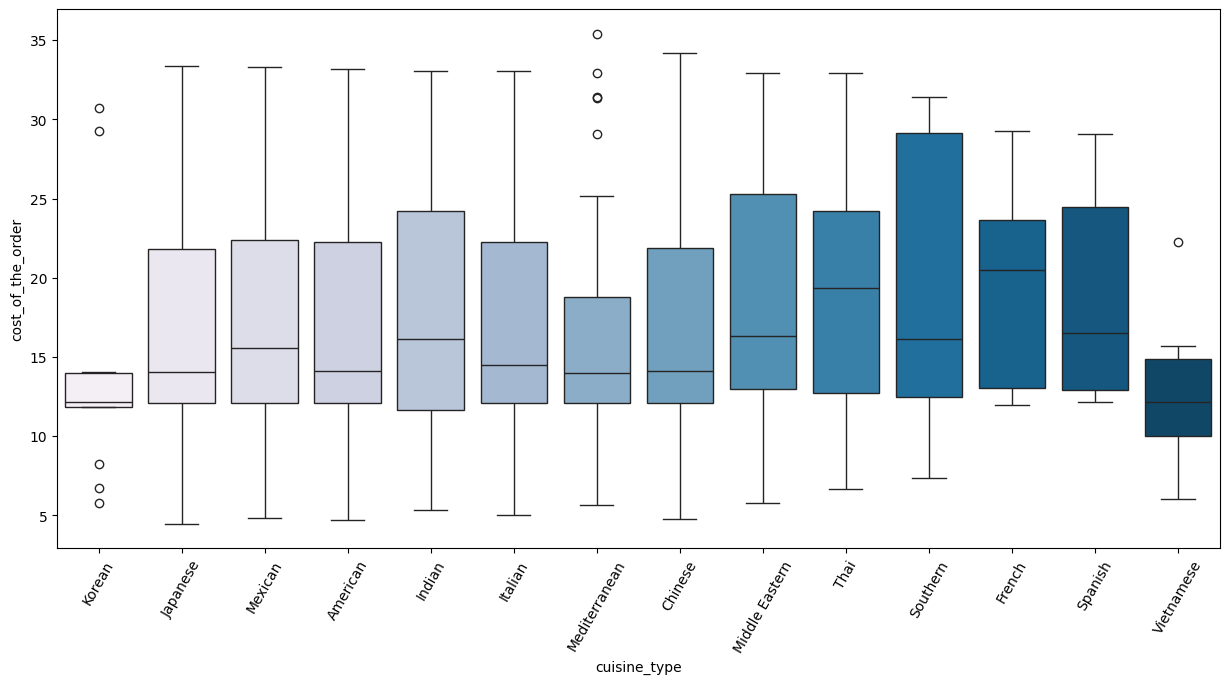

In [ ]:
# Relationship between cost of the order and cuisine type
plt.figure(figsize=(15,7))
sns.boxplot(x = "cuisine_type", y = "cost_of_the_order", data = df, palette = 'PuBu')
plt.xticks(rotation = 60)
plt.show()

#### Cuisine vs Food Preparation time

<ipython-input-29-0a29d2d5d842>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = "cuisine_type", y = "food_preparation_time", data = df, palette = 'PuBu')


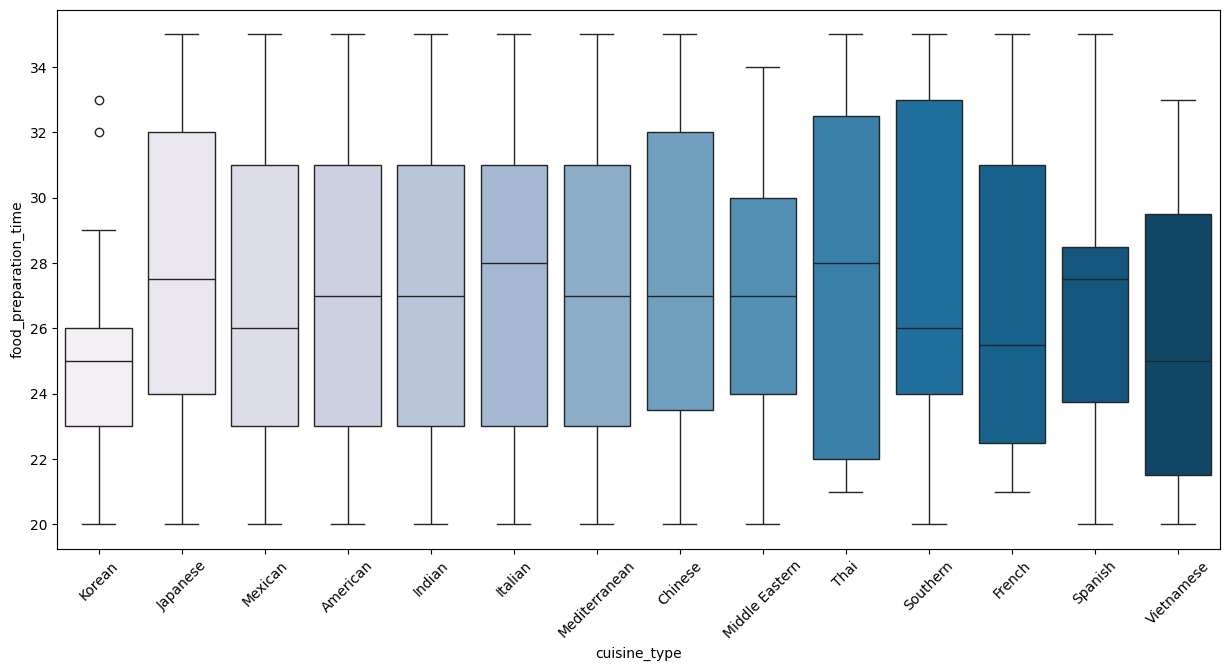

In [ ]:
# Relationship between food preparation time and cuisine type
plt.figure(figsize=(15,7))
sns.boxplot(x = "cuisine_type", y = "food_preparation_time", data = df, palette = 'PuBu')
plt.xticks(rotation = 45)
plt.show()

#### Day of the Week vs Delivery time

<ipython-input-53-52f284d88a6c>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = "delivery_time", y = "day_of_the_week", data = df, palette = 'PuBu')  ## Complete the code to visualize the relationship between day of the week and delivery time using boxplot


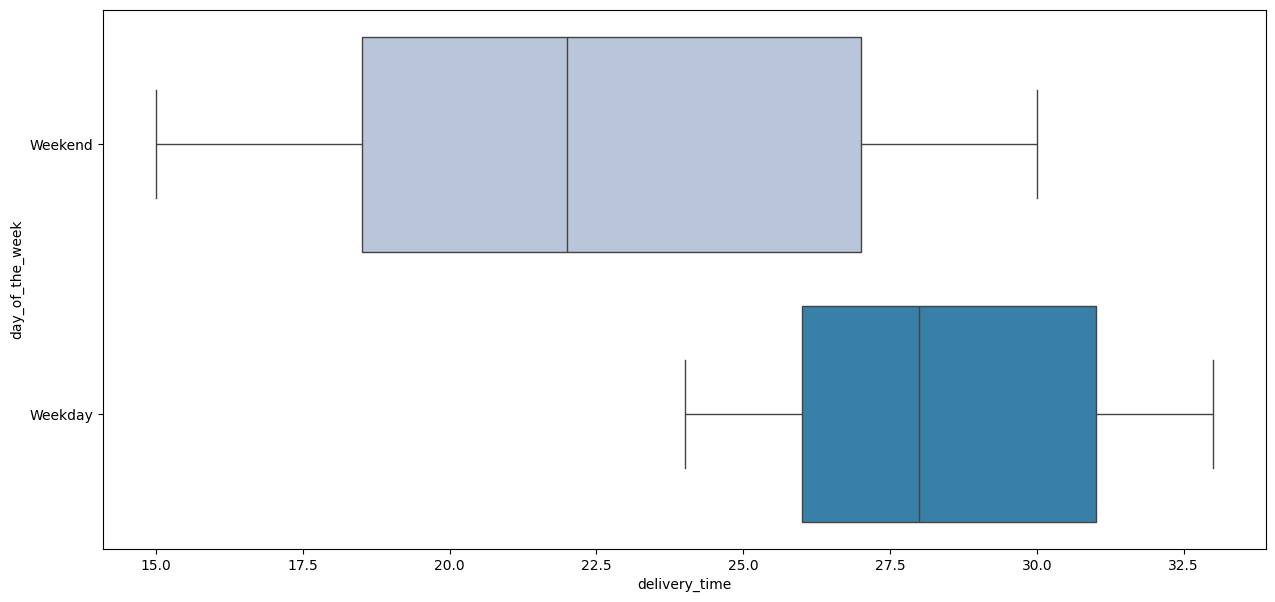

In [ ]:
# Relationship between day of the week and delivery time
plt.figure(figsize=(15,7))
sns.boxplot(x = "delivery_time", y = "day_of_the_week", data = df, palette = 'PuBu')
plt.show()

#### observations on the revenue generated by the restaurants

In [ ]:
df.groupby(['restaurant_name'])['cost_of_the_order'].sum().sort_values(ascending = False).head(14)

restaurant_name
Shake Shack                      3579.53
The Meatball Shop                2145.21
Blue Ribbon Sushi                1903.95
Blue Ribbon Fried Chicken        1662.29
Parm                             1112.76
RedFarm Broadway                  965.13
RedFarm Hudson                    921.21
TAO                               834.50
Han Dynasty                       755.29
Blue Ribbon Sushi Bar & Grill     666.62
Rubirosa                          660.45
Sushi of Gari 46                  640.87
Nobu Next Door                    623.67
Five Guys Burgers and Fries       506.47
Name: cost_of_the_order, dtype: float64

In [ ]:
plt.figure(figsize = (15,5))
sns.countplot(data = df, x = 'cuisine_type') ## Create a countplot for cuisine type.

#### Rating vs cuisine type

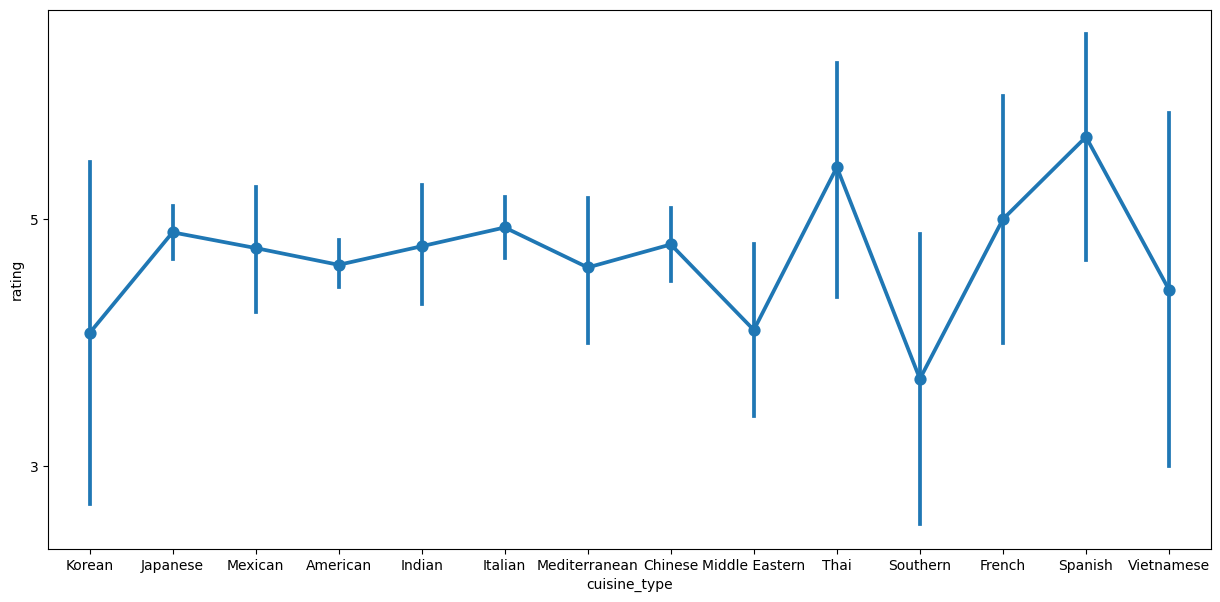

In [ ]:
# Relationship between rating and cuisine type
plt.figure(figsize=(15, 7))
sns.pointplot(x = 'cuisine_type', y = 'rating', data = df) #order=['Not given', 3, 4, 5])
plt.show()

#### Rating vs Delivery time

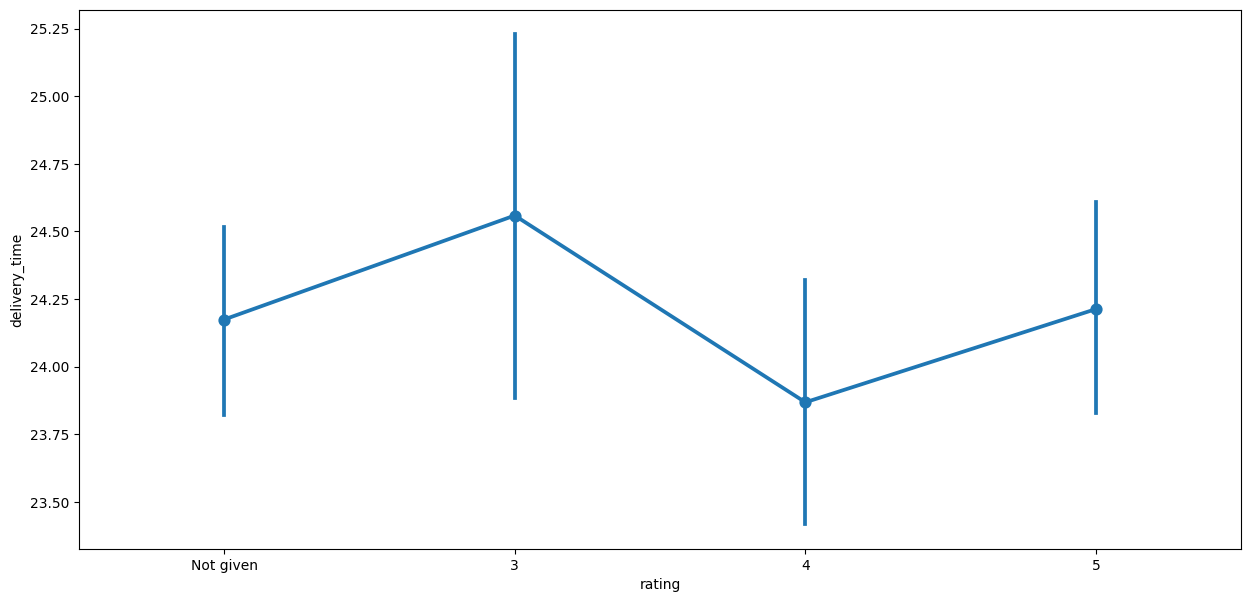

In [ ]:
# Relationship between rating and delivery time
plt.figure(figsize=(15, 7))
sns.pointplot(x = 'rating', y = 'delivery_time', data = df, order=['Not given', 3, 4, 5])
plt.show()

#### Rating vs Food preparation time

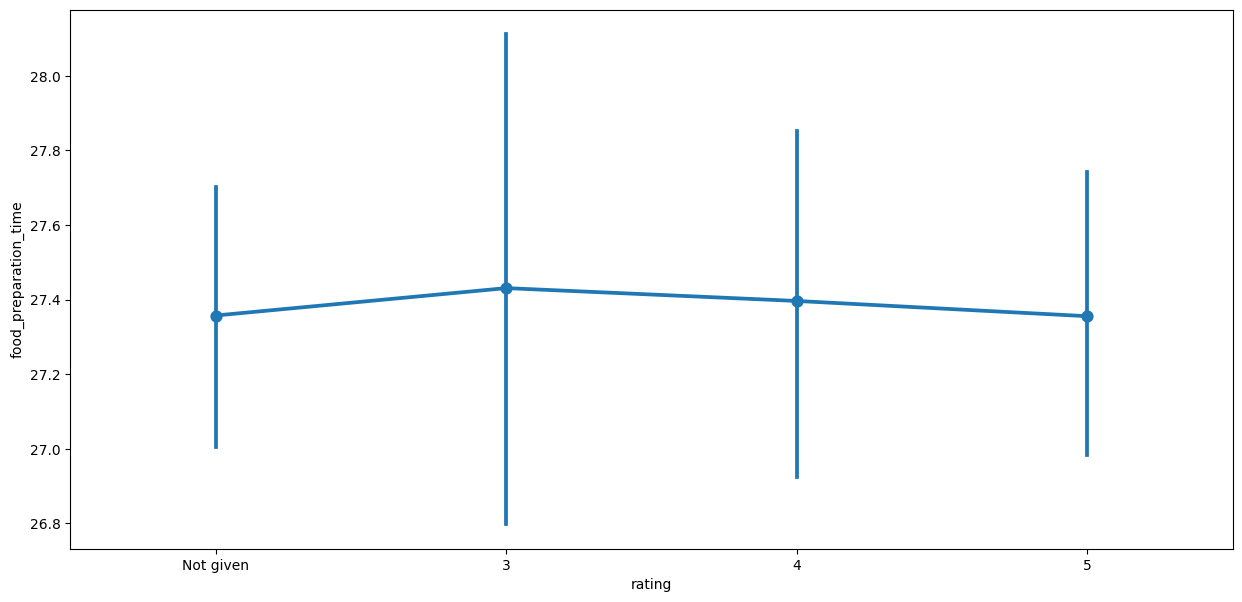

In [ ]:
# Relationship between rating and food preparation time
plt.figure(figsize=(15, 7))
sns.pointplot(x = 'rating', y = 'food_preparation_time', data = df, order=['Not given', 3, 4, 5])
## Code to visualize the relationship between rating and food preparation time using pointplot
plt.show()

#### Rating vs Cost of the order

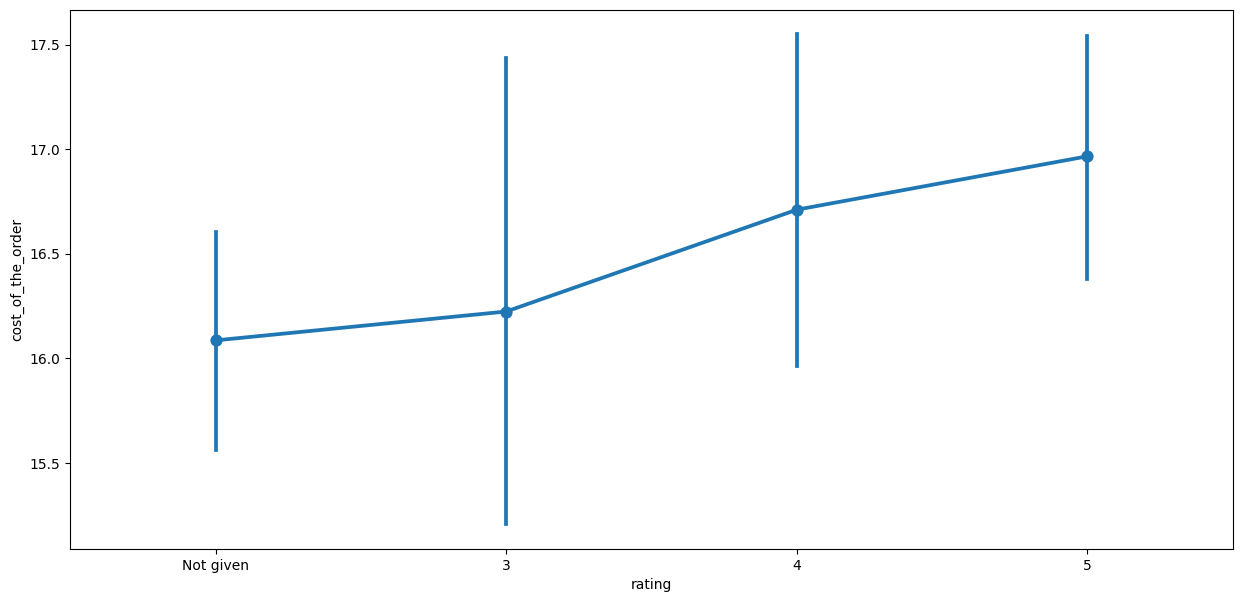

In [ ]:
# Relationship between rating and cost of the order
plt.figure(figsize=(15, 7))
sns.pointplot(x = 'rating', y = 'cost_of_the_order', data = df, order=['Not given', 3, 4, 5])   ## Code to visualize the relationship between rating and cost of the order using pointplot
plt.show()

#### Correlation among variables


***descriptive statistics***
Heat maps can help give the nature of the difference in the distributions

the pairs plot gives a visual representation of the relationships between variables

the correlation coeffiecient is the number that represents the relationships between variables. the correlation coefficient give a number between -1 and +1

a high positive correlation indicated by a number close to one, indicates a strong positive relationship

it is a normalized version of a covariance

incase the numbers do not tell the whole story one can give a visual representation

HEAT MAP WITH RATING CUISINE TYPE AND COST OF ORDER

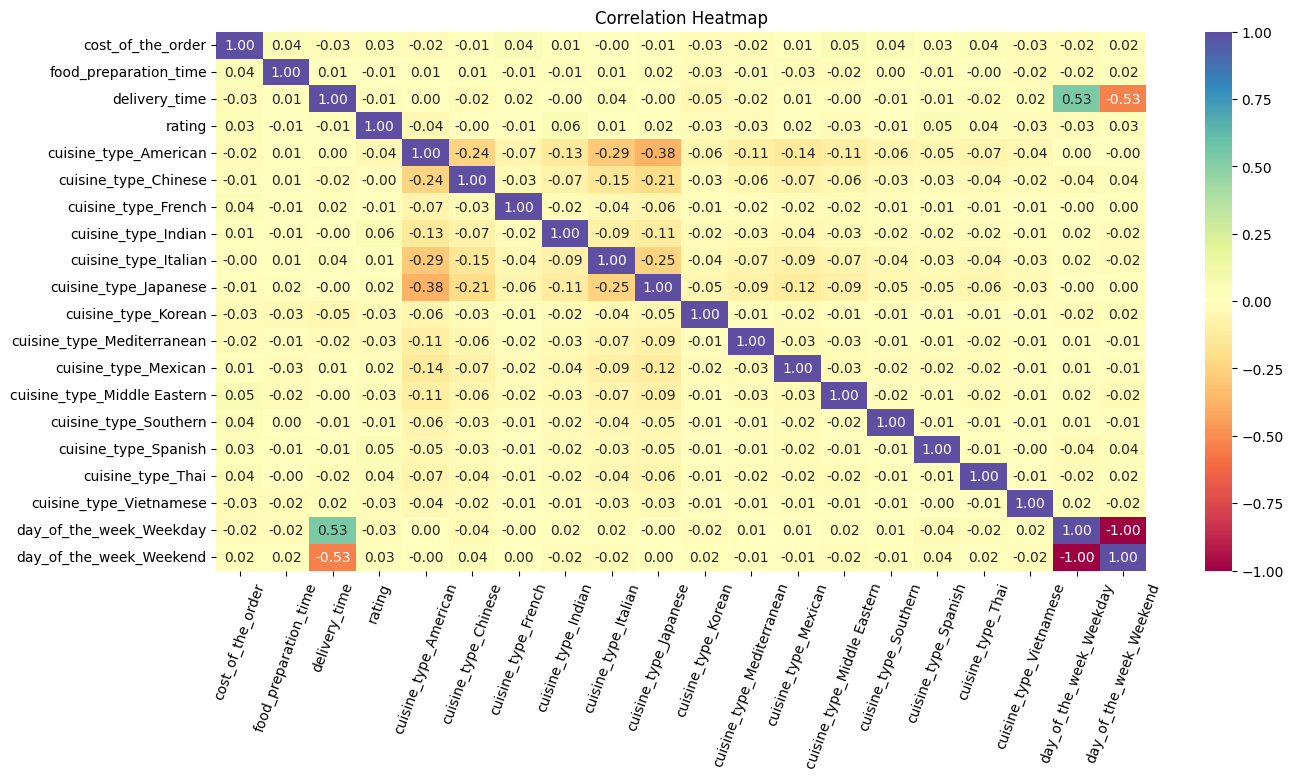

In [ ]:
df.replace('Not given', np.nan, inplace=True) # Replacing 'Not given' with NaN

# One-hot encode the categorical variables
df_encoded = pd.get_dummies(df, columns=['cuisine_type', 'day_of_the_week'])

# these are the columns included in my heatmap
col_list = ['cost_of_the_order','food_preparation_time', 'delivery_time', 'rating'] + list(df_encoded.columns[df_encoded.columns.str.startswith('cuisine_type_')]) + list(df_encoded.columns[df_encoded.columns.str.startswith('day_of_the_week_')])

# Plot the heatmap
plt.figure(figsize=(15, 7))
sns.heatmap(df_encoded[col_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.title('Correlation Heatmap')

plt.xticks(rotation = 70)
plt.show()

ANOTHER HEAT MAP

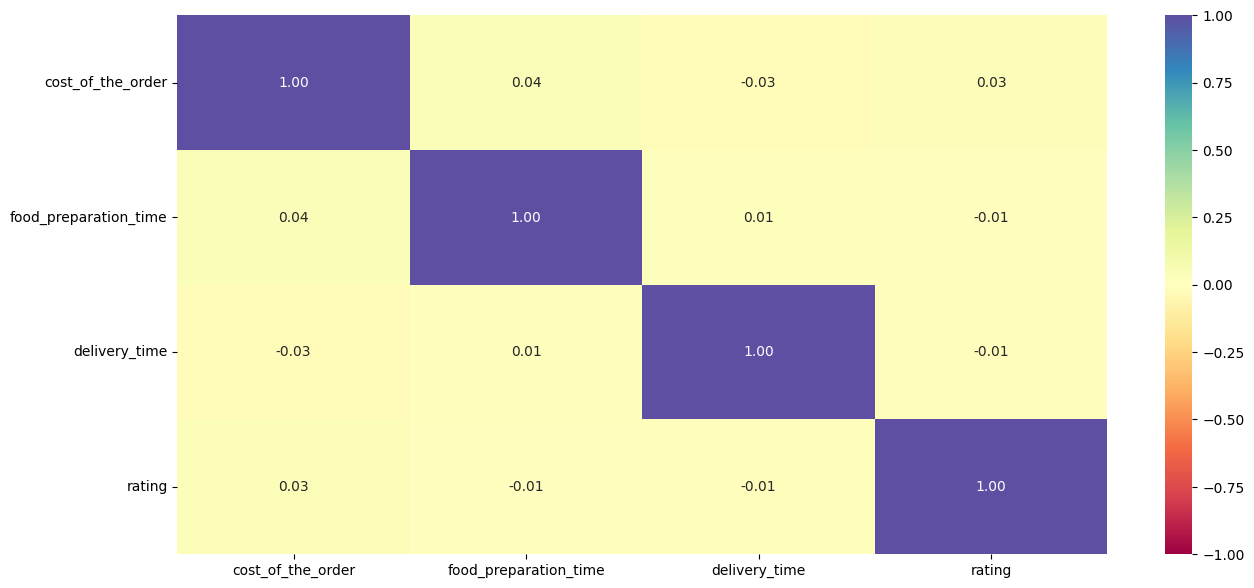

In [ ]:
df.replace('Not given', np.nan, inplace=True) # Replacing 'Not given' with NaN

# Plot the heatmap
col_list = ['cost_of_the_order', 'food_preparation_time', 'delivery_time', 'rating']
plt.figure(figsize=(15, 7))
sns.heatmap(df[col_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

### The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Here is the code I wrote to find the restaurants fulfilling the criteria to get the promotional offer

In [ ]:
# Filter the rated restaurants
df_rated = df[df['rating'] != 'Not given'].copy()

# Convert rating column from object to integer
df_rated['rating'] = df_rated['rating'].astype('int')

# Create a dataframe that contains the restaurant names with their rating counts
df_rating_count = df_rated.groupby(['restaurant_name'])['rating'].count().sort_values(ascending = False).reset_index()
df_rating_count.head(11)

,restaurant_name,rating
0,Shake Shack,133
1,The Meatball Shop,84
2,Blue Ribbon Sushi,73
3,Blue Ribbon Fried Chicken,64
4,RedFarm Broadway,41
5,Parm,39
6,RedFarm Hudson,34
7,TAO,28
8,Rubirosa,24
9,Nobu Next Door,23


In [ ]:
## Code to get the restaurant names having rating count more than 50
rest_names = df_rating_count[df_rating_count['rating'] > 50]['restaurant_name']

# Filter to get the data of restaurants that have rating count more than 50
df_mean_4 = df_rated[df_rated['restaurant_name'].isin(rest_names)].copy()

# Group the restaurant names with their ratings and find the mean rating of each restaurant
df_mean_4.groupby(['restaurant_name'])['rating'].mean().sort_values(ascending = False).reset_index().dropna() ## Code to find the mean rating


,restaurant_name,rating
0,The Meatball Shop,4.511905
1,Blue Ribbon Fried Chicken,4.328125
2,Shake Shack,4.278195
3,Blue Ribbon Sushi,4.219178


### The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Here is the code I wrote to find the net revenue generated by the company across all orders

In [ ]:
#function to determine the revenue
def compute_rev(x):
    if x > 20:
        return x*0.25
    elif x > 5:
        return x*0.15
    else:
        return x*0

df['Revenue'] = df['cost_of_the_order'].apply(compute_rev) ## Code for the apprpriate column name to compute the revenue
df.head(11)

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,Revenue
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20,7.6875
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23,1.8120
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28,1.8345
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15,7.3000
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24,1.7385
5,1477224,147468,Tamarind TriBeCa,Indian,25.22,Weekday,3,20,24,6.3050
6,1477894,157711,The Meatball Shop,Italian,6.07,Weekend,Not given,28,21,0.9105
7,1477859,89574,Barbounia,Mediterranean,5.97,Weekday,3,33,30,0.8955
8,1477174,121706,Anjappar Chettinad,Indian,16.44,Weekday,5,21,26,2.4660
9,1477311,39705,Bukhara Grill,Indian,7.18,Weekday,5,29,26,1.0770


In [ ]:
# get the total revenue and print it
total_rev = df['Revenue'].sum() ## Code to get the total revenue
print('The net revenue is around', round(total_rev, 2), 'dollars')

The net revenue is around 6166.3 dollars


### The company wants to analyze the total time required to deliver the food. Here is the code to find what percentage of orders take more than 60 minutes to get delivered from the time the order is placed?

In [ ]:
# Calculate total delivery time and add a new column to the dataframe df to store the total delivery time
df['total_time'] = df['food_preparation_time'] + df['delivery_time']


## Code for the percentage of orders that have more than 60 minutes of total delivery time

df_above_60_minutes = df[df['total_time'] > 60]
percentage_above_60 = (df_above_60_minutes.shape[0] / df.shape[0]) * 100

print("Percentage of orders with more than 60 minutes of total delivery time:", round(percentage_above_60, 2), '%')


#----
# personal notes
#from above..
# Get orders that cost above 20 dollars
#df_greater_than_20 = df[df["cost_of_the_order"]>20] ## Code to get the orders having cost above $20

# Calculate the number of total orders where the cost is above 20 dollars
#print('The number of total orders that cost above 20 dollars is:', df_greater_than_20.shape[0])

# Calculate percentage of such orders in the dataset
#percentage = (df_greater_than_20.shape[0] / df.shape[0]) * 100

#print("Percentage of orders above 20 dollars:", round(percentage, 2), '%')



NameError: name 'df' is not defined

### Here is the code to analyze the delivery time of the orders on weekdays and weekends. Also shows how the delivery times vary during weekdays and weekends

In [ ]:
# Get the mean delivery time on weekdays and print it
print('The mean delivery time on weekdays is around',
      round(df[df['day_of_the_week'] == 'Weekday']['delivery_time'].mean()),
     'minutes')


## Code I wrote for mean delivery time on weekends and to print it
print('The mean delivery time on weekends is around',
      round(df[df['day_of_the_week'] == 'Weekend']['delivery_time'].mean()),
     'minutes')





The mean delivery time on weekdays is around 28 minutes
The mean delivery time on weekends is around 22 minutes


### Conclusion and Recommendations

### ***EXECUTIVE SUMMARY***
### Conclusions:
*  out of the 14 cuisine types #1 American, #2 Japanese, #3 Italian #4 Chinese and #5 Mexican are the most popular
* out of the 173 restaurants: Shake Shack, The Meatball Shop and Blue Ribbon Sushi are the top 3 restaurants
*in terms of revenue Shake Shack was #1 $3,579.53, The MEatball Shop #2 at $2,145 and Blue Ribbon Sushi #3 $1,903.95
* in terms of customer rating The meatball shop was #1, Blue Ribbon Fried Chicken #2 and shake shack just about tied with Blue Ribbon Sushi for #3
* each come from the the top 3 cuisines Anerican, Japanese and Italian
--------->Shake Shack -  American
--------->The Meatball - Italian
--------->Blue Ribbon Sushi - Japanese
--------->Blue Ribbon Fried Chicken - American
--------->Parm - Italian


* the total amount of orders during the weekend is the total amount of order during the week
* out of the 1898 orders in the data, 61% of the customers gave a rating.
* ---> *of this sub group of rated customers 1,162 in total:
-----> 51% gave a rating of 5 stars
-----> 33% a rating of 4 stars
-----> 16% gave a 3 start rating
-----> No customer gave a 2 or 1` star rating

* Thai food takes the most time to prepare

* The highest rated orders have a correlation coefficient of 0.03 to the cost of the order
-----> higher costing retaurants can mean higher quality food. Getting more high quality merchants may be a way to increase the amount of satisfied customers



### Recommendations:

since The number of total orders that cost above 20 dollars is: 555
Percentage of orders above 20 dollars: 29.24 %

the three most popular cuisines have thw bulk of thier orders under $20

providing promotional discounts to cuisines like Middle Eastern and french may bring more exposure to those restaurants and more revenue to the company

Revising the pricing structure may give more incentives for restaurants:

using these three segments

Orders under $5: Given the lower order value, consider a flat commission rate that ensures profitability without discouraging restaurants from offering lower-cost items. For example, maintaining a 25% commission.

Orders between $5 and $20: Given the findings that the bulk of orders fall within this range, a competitive rate that incentivizes more orders could be 20%.

Orders over $20: Given the higher order value, the commission rate should be reduced to 15% to incentivize restaurants to offer higher-cost items and to increase company revenue.

---